In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('Titanictrain.csv')

In [3]:
import os 

In [68]:
os.getcwd()

'C:\\Users\\Karthik Bharadhwaj\\Python Datascience'

In [69]:
os.chdir('..')

In [70]:
os.getcwd()

'C:\\Users\\Karthik Bharadhwaj'

In [71]:
#os.chdir('Logistic Regression')

In [72]:
os.getcwd()

'C:\\Users\\Karthik Bharadhwaj'

In [73]:
test = pd.read_csv('C:\\Users\\Karthik Bharadhwaj\\Python Datascience\\DataSets\\Logistic Regression\\Titanictest.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Gender         418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

In [ ]:
test.describe()

In [ ]:
train.describe()

In [76]:
missing = train.isna().sum()

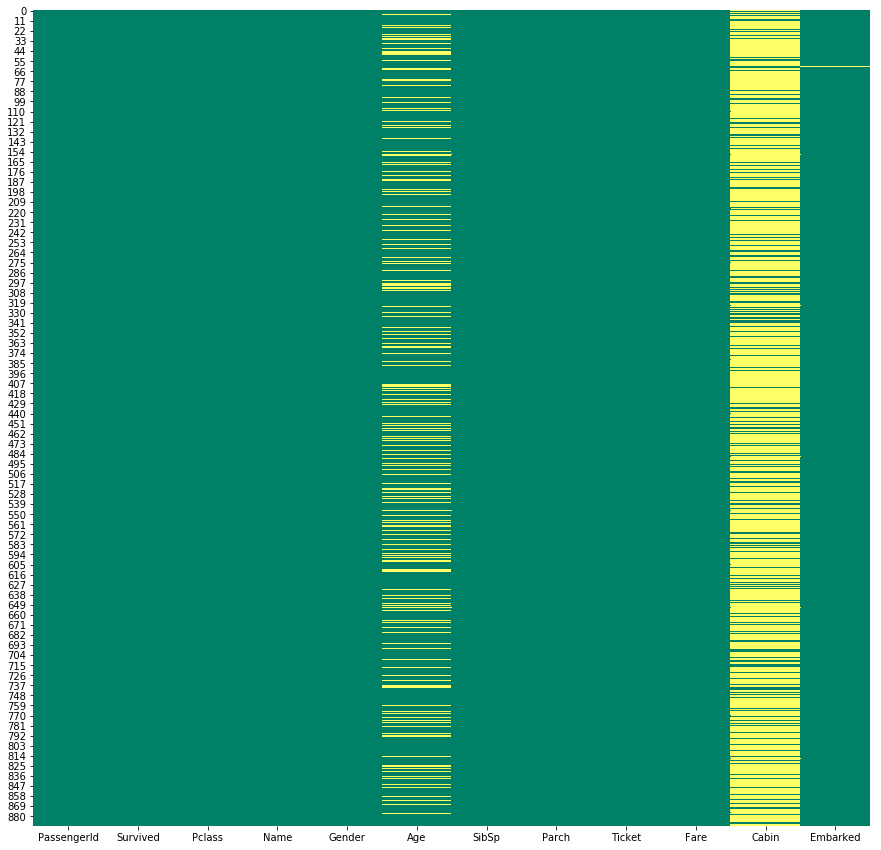

In [77]:
plt.figure(figsize=(15,15))
sb.heatmap(train.isna(),cbar=False,cmap='summer')

In [78]:
v = (missing/891*100).astype('int64').astype('str')+'%'

In [79]:
train.Cabin.isna().value_counts()[1]

687

In [80]:
v

PassengerId     0%
Survived        0%
Pclass          0%
Name            0%
Gender          0%
Age            19%
SibSp           0%
Parch           0%
Ticket          0%
Fare            0%
Cabin          77%
Embarked        0%
dtype: object

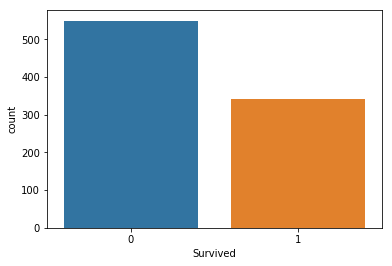

In [81]:
sb.countplot(train.Survived)

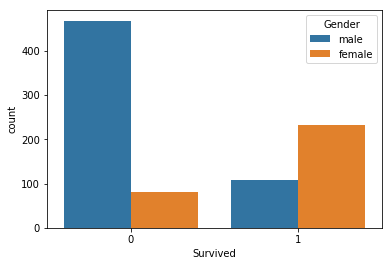

In [82]:
sb.countplot(train.Survived,hue=train.Gender)

In [ ]:
sb.countplot(train.Survived,hue=train.Pclass)

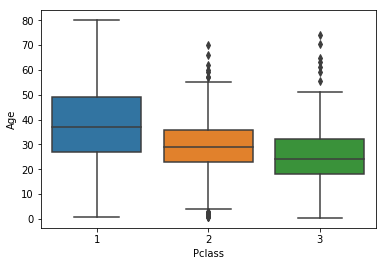

In [83]:
sb.boxplot(x= train.Pclass,y = train.Age)

In [84]:
train.Age[train.Pclass == 1].isna().sum()

30

In [85]:
train.Age[train.Pclass == 2].isna().sum()

11

In [86]:
train.Age[train.Pclass == 3].isna().sum()

136

In [87]:
train[train.Age.isna()]['Pclass'].value_counts().sort_index()

1     30
2     11
3    136
Name: Pclass, dtype: int64

In [88]:
train.groupby('Pclass')['Age'].transform('mean')

0      25.140620
1      38.233441
2      25.140620
3      38.233441
4      25.140620
5      25.140620
6      38.233441
7      25.140620
8      25.140620
9      29.877630
10     25.140620
11     38.233441
12     25.140620
13     25.140620
14     25.140620
15     29.877630
16     25.140620
17     29.877630
18     25.140620
19     25.140620
20     29.877630
21     29.877630
22     25.140620
23     38.233441
24     25.140620
25     25.140620
26     25.140620
27     38.233441
28     25.140620
29     25.140620
         ...    
861    29.877630
862    38.233441
863    25.140620
864    29.877630
865    29.877630
866    29.877630
867    38.233441
868    25.140620
869    25.140620
870    25.140620
871    38.233441
872    38.233441
873    25.140620
874    29.877630
875    25.140620
876    25.140620
877    25.140620
878    25.140620
879    38.233441
880    29.877630
881    25.140620
882    25.140620
883    29.877630
884    25.140620
885    25.140620
886    29.877630
887    38.233441
888    25.1406

In [89]:
train.Age = train.Age.fillna(train.groupby('Pclass')['Age'].transform('mean'))

In [90]:
train

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C


In [91]:
train_df = train.drop(columns='Cabin')

In [92]:
train_df.dropna(inplace=True)

In [93]:
train_df.shape

(889, 11)

In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Gender         889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [95]:
cor = train_df.corr()
print(cor)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.032411 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.055278 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.400919  0.081656  0.016824   
Age             0.032411 -0.055278 -0.400919  1.000000 -0.242737 -0.174818   
SibSp          -0.057686 -0.034040  0.081656 -0.242737  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.174818  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.118050  0.160887  0.217532   

                 Fare  
PassengerId  0.012703  
Survived     0.255290  
Pclass      -0.548193  
Age          0.118050  
SibSp        0.160887  
Parch        0.217532  
Fare         1.000000  


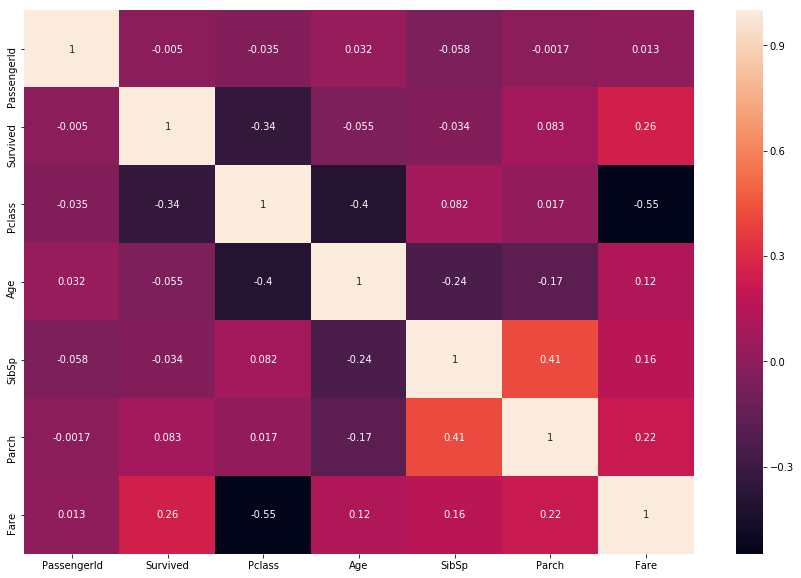

In [96]:
plt.figure(figsize=(15,10))
sb.heatmap(cor,annot=True)

### One-Hot-Encoding

In [97]:
#Converting  Categories Features -one_hot_encoding

#pd.get_dummies(train_df['Gender']).head()

pd.get_dummies(train_df['Gender'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [98]:
pd.get_dummies(train_df.Embarked,drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [99]:
Gender = pd.get_dummies(train_df.Gender,prefix='Gender',drop_first=True)
embark = pd.get_dummies(train_df.Embarked,prefix='Embarked',drop_first=True)

In [100]:
Gender

,Gender_male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [101]:
train = pd.concat([train_df,Gender,embark],axis=1)

In [103]:
train.drop(['PassengerId','Name','Gender','Ticket','Embarked'],axis=1,inplace=True)

In [104]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
5,0,3,25.14062,0,0,8.4583,1,1,0
6,0,1,54.00000,0,0,51.8625,1,0,1
7,0,3,2.00000,3,1,21.0750,1,0,1
8,1,3,27.00000,0,2,11.1333,0,0,1
9,1,2,14.00000,1,0,30.0708,0,0,0


In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train , X_test,Y_train,Y_test = train_test_split(train.drop('Survived',axis=1),train.Survived,test_size=0.30,random_state=101)

,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
511,3,25.140620,0,0,8.0500,1,0,1
613,3,25.140620,0,0,7.7500,1,1,0
615,2,24.000000,1,2,65.0000,0,0,1
337,1,41.000000,0,0,134.5000,0,0,0
718,3,25.140620,0,0,15.5000,1,1,0
152,3,55.500000,0,0,8.0500,1,0,1
826,3,25.140620,0,0,56.4958,1,0,1
418,2,30.000000,0,0,13.0000,1,0,1
614,3,35.000000,0,0,8.0500,1,0,1
241,3,25.140620,1,0,15.5000,0,1,0


In [110]:
X_train.shape

(622, 8)

In [111]:
Y_train.shape

(622,)

In [126]:
from sklearn.linear_model import  LogisticRegression

logmodel = LogisticRegression()
a = logmodel.fit(X_train,Y_train)

#generate predictions 

predictions_train = logmodel.predict(X_train)
predictions_test = logmodel.predict(X_test)

In [118]:
predictions_train

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [119]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
807,3,18.00000,0,0,7.775,0,0,1
651,2,18.00000,0,1,23.000,0,0,1
2,3,26.00000,0,0,7.925,0,0,1
690,1,31.00000,1,0,57.000,1,0,1
196,3,25.14062,0,0,7.750,1,1,0


In [116]:
logmodel.intercept_

array([3.52874524])

In [117]:
logmodel.coef_

array([[-7.87463750e-01, -2.62413030e-02, -2.17666406e-01,
        -8.76740952e-02,  4.67983950e-03, -2.32240270e+00,
         2.17065022e-04, -1.70444779e-01]])

In [124]:
logmodel.predict_proba(X_train)[:,1]

array([0.63644132, 0.79100463, 0.58679291, 0.37379695, 0.14439138,
       0.51322547, 0.98552076, 0.65337748, 0.59182606, 0.9241348 ,
       0.31728213, 0.10381788, 0.31129023, 0.11895465, 0.10304807,
       0.14439138, 0.11407624, 0.13695618, 0.54831517, 0.09671852,
       0.12463352, 0.89787369, 0.79214679, 0.51735402, 0.91244113,
       0.91564554, 0.12430417, 0.055975  , 0.23129216, 0.1182001 ,
       0.51224743, 0.09909986, 0.59239119, 0.46281928, 0.20922337,
       0.14406377, 0.1545272 , 0.75202738, 0.40725686, 0.13963478,
       0.10436403, 0.61411397, 0.57686719, 0.60228108, 0.80989902,
       0.65797001, 0.54272415, 0.1113741 , 0.93725798, 0.12043199,
       0.14959585, 0.16634323, 0.80043533, 0.13706452, 0.14439138,
       0.11475827, 0.1037653 , 0.11384534, 0.24607015, 0.90137949,
       0.1062873 , 0.11952332, 0.13399021, 0.3748397 , 0.14484305,
       0.08857897, 0.26508691, 0.91466901, 0.58671257, 0.15027125,
       0.14492185, 0.21259839, 0.14945426, 0.37296435, 0.12471

In [125]:
np.where(logmodel.predict_proba(X_train)[:,1] > 0.7 , 1,0)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [127]:
a

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score

In [129]:
print(classification_report(Y_train,predictions_train))
print('Accuracy :', accuracy_score(Y_train,predictions_train))

             precision    recall  f1-score   support

          0       0.82      0.87      0.84       386
          1       0.76      0.69      0.72       236

avg / total       0.80      0.80      0.80       622

Accuracy : 0.8006430868167203


In [131]:
print(classification_report(Y_test,predictions_test))
print('Accuracy :',accuracy_score(Y_test,predictions_test))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267

Accuracy : 0.8089887640449438


In [133]:
#compute COnfusion matrix 
cnf_matrix = confusion_matrix(y_true=Y_train,y_pred=predictions_train)

cm = pd.DataFrame(cnf_matrix)

cm

,0,1
0,336,50
1,74,162


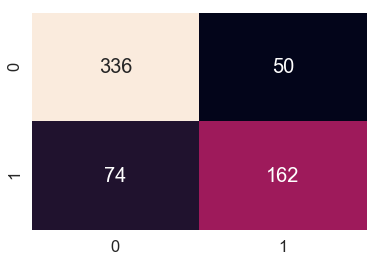

In [136]:
sb.set(font_scale=1.5) #for label size
sb.heatmap(cm,annot=True,fmt='g',annot_kws={'size':20},cbar=False)

In [138]:
#determine the false positive and true positive 
FPR, TPR , _ =roc_curve(Y_train,predictions_train) 

In [140]:
FPR1, TPR1, _1 = roc_curve(Y_test,predictions_test)

In [141]:
#calculate  the auc 

roc_auc = auc(FPR,TPR)
print('ROC AUC : %0.3f' % roc_auc)

roc_auc1 = auc(FPR1,TPR1)
print('ROC AUC : %0.3f' % roc_auc1)

ROC AUC : 0.778
ROC AUC : 0.781


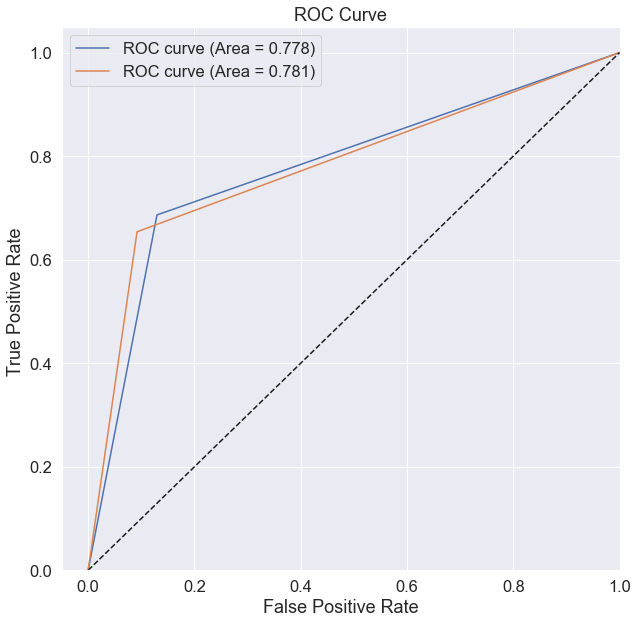

In [142]:
plt.figure(figsize=(10,10))
plt.plot(FPR,TPR,label = 'ROC curve (Area = %0.3f)' % roc_auc)
plt.plot(FPR1,TPR1,label = 'ROC curve (Area = %0.3f)'% roc_auc1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('ROC Curve')
plt.legend(loc =0)
plt.show()

In [143]:
plt.xlim?

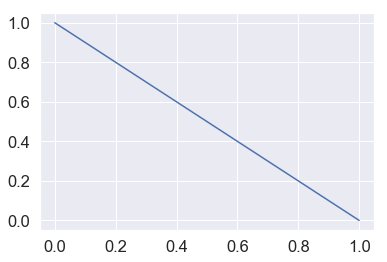

In [151]:
plt.plot([1,0])